# 1. Import library and data

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [22]:
train = pd.read_csv("/Users/seojeongmin/Desktop/study/Human_Activity_Recognition/dataset/train.csv")
test = pd.read_csv("/Users/seojeongmin/Desktop/study/Human_Activity_Recognition/dataset/test.csv")

# 2. Check data

In [23]:
train.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [24]:
test.head(5)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [25]:
train.shape

(7352, 563)

In [26]:
test.shape

(2947, 563)

In [27]:
columns_list = train.columns.tolist()
columns_list

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

## 변수 의미 알기
- mean(): Mean value
- std(): Standard deviation
- mad(): Median absolute deviation
- max(): Largest value in array
- min(): Smallest value in array
- sma(): Signal magnitude area
- energy(): Energy measure. Sum of the squares divided by the number of values.
- iqr(): Interquartile range
- entropy(): Signal entropy
- arCoeff(): Autorregresion coefficients with Burg order equal to 4
- correlation(): correlation coefficient between two signals
- maxInds(): index of the frequency component with largest magnitude
- meanFreq(): Weighted average of the frequency components to obtain a mean frequency
- skewness(): skewness of the frequency domain signal
- kurtosis(): kurtosis of the frequency domain signal
- bandsEnergy(): Energy of a frequency interval within the 64 bins of the FFT of each window.
- angle(): Angle between to vectors.

In [28]:
train['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

## Label 종류(activity)
- Standing
- Sitting
- Laying
- Walking
- WalkingDownstairs
- WalkingUpstairs

# 3. Feature Engineering

## 3.1 중복값 및 결측치 확인

In [29]:
train_duplicates = train.duplicated().sum()
test_duplicates = test.duplicated().sum()

In [30]:
train_nulls = train.isnull().sum().sum()
test_nulls = test.isnull().sum().sum()

In [31]:
train_duplicates, test_duplicates, train_nulls, test_nulls

(0, 0, 0, 0)

## 3.2 데이터 불균형 확인

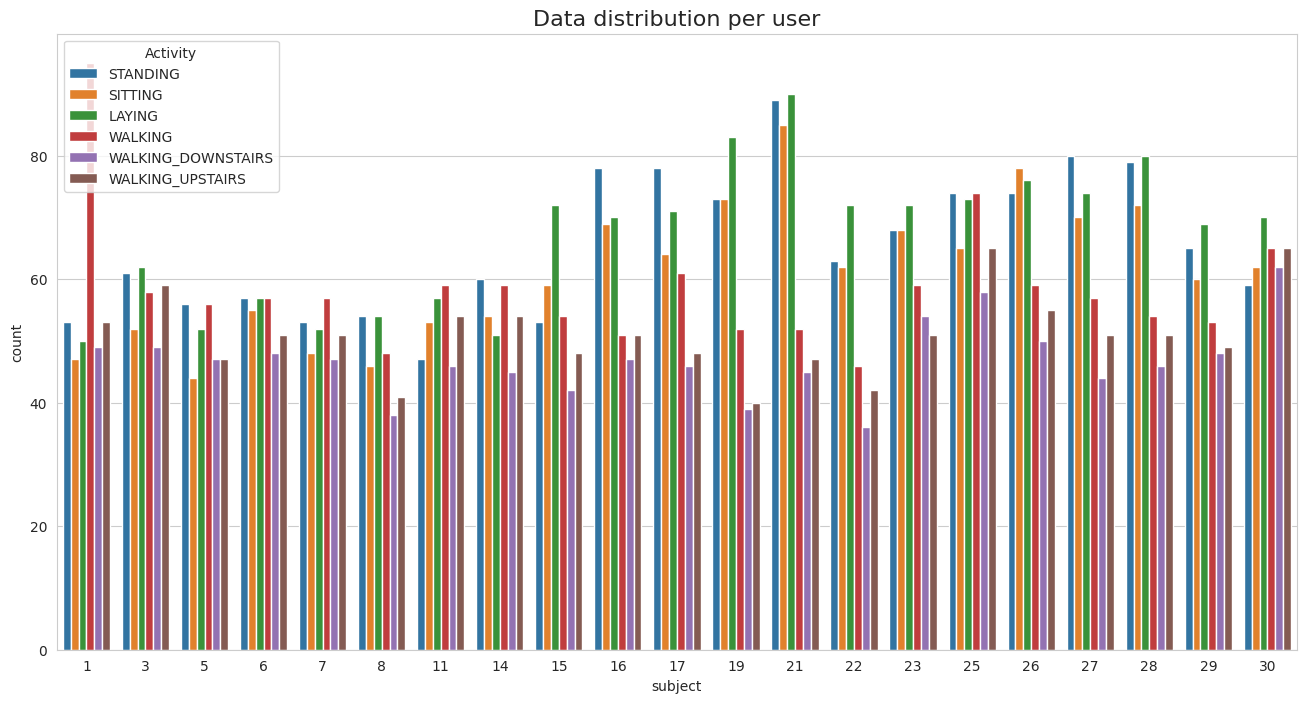

In [32]:
sns.set_style('whitegrid')
plt.rcParams['font.family'] = 'Dejavu Sans'

plt.figure(figsize=(16,8))
sns.countplot(x='subject', hue='Activity', data=train)
plt.title('Data distribution per user', fontsize=16)
plt.show()

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64


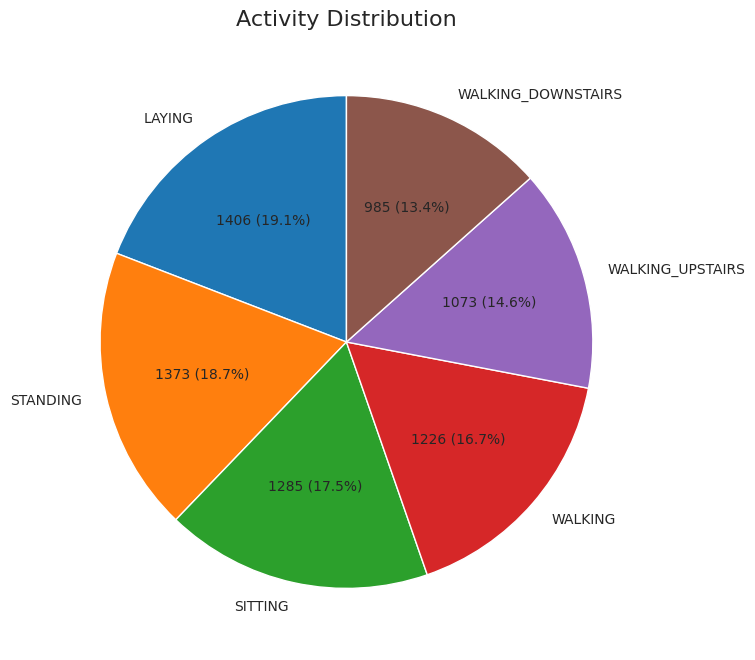

In [33]:
activity_counts = train['Activity'].value_counts()
print(activity_counts)

def func(pct, allvals):
    absolute = int(pct / 100.*sum(allvals))
    return f"{absolute} ({pct:.1f}%)"

plt.figure(figsize=(8, 8))
plt.pie(
    activity_counts,
    labels=activity_counts.index,
    autopct=lambda pct: func(pct, activity_counts),
    startangle=90,
    colors=plt.cm.tab10.colors
)
plt.title('Activity Distribution', fontsize=16)
plt.show()

## 3.3 Column명 간소화

In [34]:
columns = train.columns

columns = columns.str.replace('[()]', '', regex=True) 
columns = columns.str.replace('-', '')                
columns = columns.str.replace(',', '')                
columns = columns.str.strip()                         

train.columns = columns
test.columns = columns

In [35]:
train.head(5)

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [36]:
test.head(5)

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,fBodyBodyGyroJerkMagkurtosis,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


# 4. 차원축소

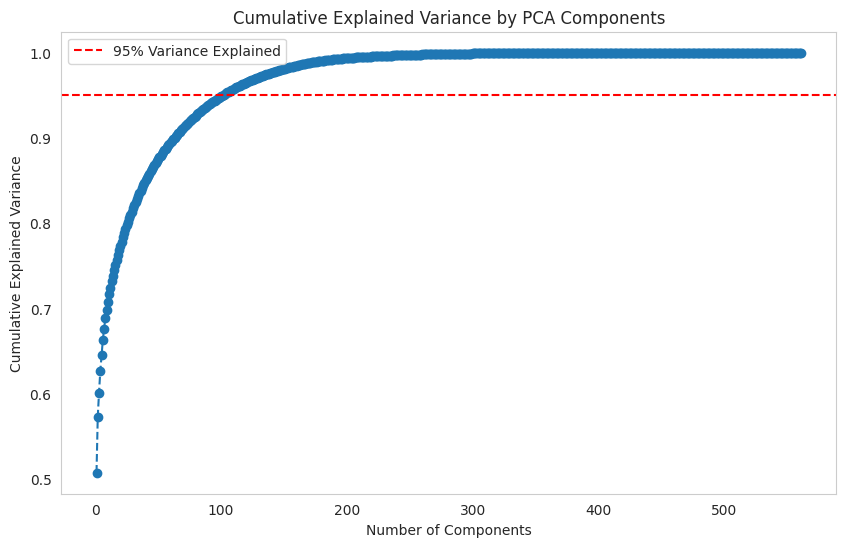

Number of components explaining 95% variance: 102


In [37]:
apply_scaling = True
X_train = train.drop(['subject', 'Activity'], axis=1)
if apply_scaling:
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)

pca = PCA()
X_train_pca = pca.fit_transform(X_train)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance Explained')
plt.legend(loc='best')
plt.grid()
plt.show()

n_components_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"Number of components explaining 95% variance: {n_components_95}")

# 5. ML Model

- 정규화 유무 × 차원 축소 기법(PCA,LDA) × 모델 종류(Logistic Regression / Linear SVC / RF)의 모든 조합의 성능을 비교할 예정

## 5.1 Prepare data

In [38]:
y_train = train['Activity']
X_train = train.drop(['subject', 'Activity'], axis=1)
y_test = test['Activity']
X_test = test.drop(['subject', 'Activity'], axis=1)

## 5.2 Standardization

In [39]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5.3. 차원 축소(PCA / LDA)

In [40]:
pca = PCA(n_components=0.95)
X_train_pca_scaled = pca.fit_transform(X_train_scaled)
X_test_pca_scaled = pca.transform(X_test_scaled)

pca_raw = PCA(n_components=0.95)
X_train_pca_raw = pca_raw.fit_transform(X_train)
X_test_pca_raw = pca_raw.transform(X_test)

lda = LDA(n_components=len(y_train.unique()) - 1)
X_train_lda_scaled = lda.fit_transform(X_train_scaled, y_train)
X_test_lda_scaled = lda.transform(X_test_scaled)

lda_raw = LDA(n_components=len(y_train.unique()) - 1)
X_train_lda_raw = lda_raw.fit_transform(X_train, y_train)
X_test_lda_raw = lda_raw.transform(X_test)

## 5.4 Model(Logistic Regression / Linear SVC / RF)

In [41]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Linear SVC": LinearSVC(max_iter=10000),
    "Random Forest": RandomForestClassifier(random_state=42)
}

## 5.5 Evaluate_model

In [42]:
results = []

def evaluate_model(name, X_train, X_test, y_train, y_test, transform, normalization):
    model = models[name]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    results.append({
        "Model": name,
        "Normalization": normalization,
        "Dimensionality Reduction": transform,
        "Accuracy": acc,
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-Score": report["weighted avg"]["f1-score"]
    })

In [43]:
for name in models.keys():
    evaluate_model(name, X_train, X_test, y_train, y_test, "None", "No")
    
    evaluate_model(name, X_train_scaled, X_test_scaled, y_train, y_test, "None", "Yes")
    
    evaluate_model(name, X_train_pca_raw, X_test_pca_raw, y_train, y_test, "PCA", "No")
    
    evaluate_model(name, X_train_pca_scaled, X_test_pca_scaled, y_train, y_test, "PCA", "Yes")

    evaluate_model(name, X_train_lda_raw, X_test_lda_raw, y_train, y_test, "LDA", "No")

    evaluate_model(name, X_train_lda_scaled, X_test_lda_scaled, y_train, y_test, "LDA", "Yes")

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="Accuracy", ascending=False)

/opt/anaconda3/envs/myenv3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/envs/myenv3.8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#l

                  Model Normalization Dimensionality Reduction  Accuracy  \
6            Linear SVC            No                     None  0.966407   
7            Linear SVC           Yes                     None  0.965049   
4   Logistic Regression            No                      LDA  0.964710   
5   Logistic Regression           Yes                      LDA  0.964710   
10           Linear SVC            No                      LDA  0.962674   
11           Linear SVC           Yes                      LDA  0.962674   
17        Random Forest           Yes                      LDA  0.962335   
16        Random Forest            No                      LDA  0.962335   
0   Logistic Regression            No                     None  0.961317   
1   Logistic Regression           Yes                     None  0.954869   
8            Linear SVC            No                      PCA  0.943332   
2   Logistic Regression            No                      PCA  0.941296   
3   Logistic

<Figure size 1200x600 with 0 Axes>

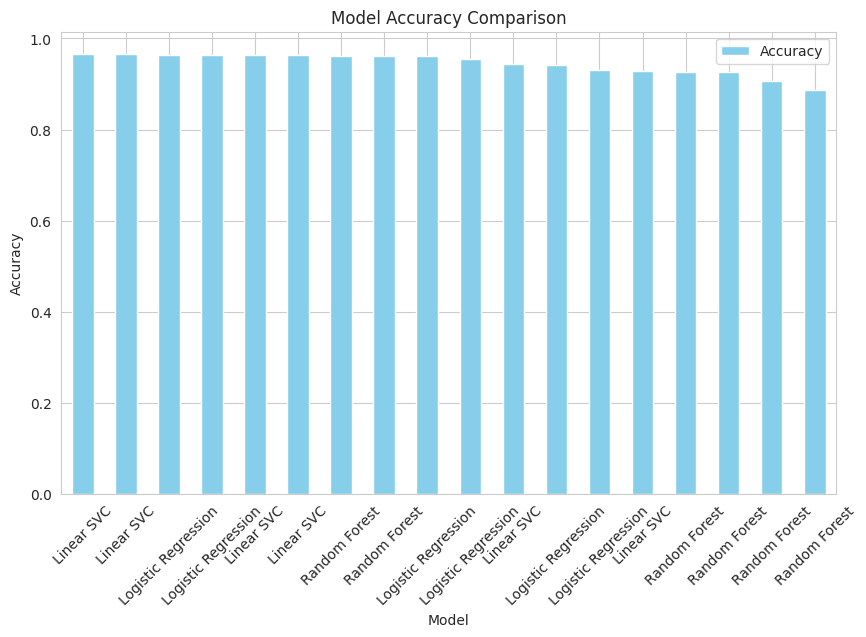

In [44]:
print(results_df)

results_df.to_csv("classification_evaluation_results.csv", index=False)

plt.figure(figsize=(12, 6))
results_df.plot(x="Model", y=["Accuracy"], kind="bar", figsize=(10, 6), color='skyblue')
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.show()

# 6. Conclusion

- PCA보다는 LDA 기법이 성능이 좋긴 하지만, 왜 아무것도 하지 않을 때가 성능이 가장 좋을까?